# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities?
6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?
8. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load dataset
link = 'https://raw.githubusercontent.com/kpunsalan8/linearModels-KP/refs/heads/main/lab/data/pierce_county_house_sales.csv'
df = pd.read_csv(link,low_memory=False)

In [3]:
# peek at data
df.head()

,sale_date,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,hvac_description,exterior,interior,stories,roof_cover,year_built,bedrooms,bathrooms,waterfront_type,view_quality,utility_sewer
0,2020-01-02,380000,2157,0,0,528,0,0,Warm and Cool Air Zone,Frame Siding,Drywall,2,Composition Shingle,1993,3,3,NaN,NaN,SEWER/SEPTIC INSTALLED
1,2020-01-02,383000,2238,0,0,396,0,0,Forced Air,Frame Siding,Drywall,2,Composition Shingle,2017,4,3,NaN,NaN,SEWER/SEPTIC INSTALLED
2,2020-01-01,419900,1452,0,0,0,0,1,Forced Air,Frame Siding,Drywall,1,Built Up Rock,1965,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED
3,2020-01-02,251660,832,0,0,0,0,0,Forced Air,Frame Vinyl,Drywall,1,Composition Shingle,1919,2,1,NaN,NaN,SEWER/SEPTIC INSTALLED
4,2020-01-02,500000,1780,0,384,484,0,1,Forced Air,Frame Siding,Drywall,1,Composition Shingle,1955,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED


In [4]:
# Q1 Explore data - columns and dimensions
df.shape
df.dtypes

,0
sale_date,object
sale_price,int64
house_square_feet,int64
attic_finished_square_feet,int64
basement_square_feet,int64
attached_garage_square_feet,int64
detached_garage_square_feet,int64
fireplaces,int64
hvac_description,object
exterior,object


In [5]:
# Clean the data

# drop columns not interested in using
# drop waterfront_type column
df.drop(columns=['waterfront_type'],inplace=True)
# drop utility_sewer column - all properties should have
df.drop(columns=['utility_sewer'],inplace=True)
# drop view_quality
df.drop(columns=['view_quality'],inplace=True)
# drop roof_cover
df.drop(columns=['roof_cover'],inplace=True)

In [6]:
# see value counts of exterior
df['exterior'].value_counts()

,count
exterior,
Frame Siding,14577
Frame Vinyl,1724
Masonry Common Brick,208
Frame Stucco,156
Masonry Concrete Block,43
Finished Cottage,41
Frame Rustic Log,21
Log,12
Frame Hardboard,11


In [7]:
# see unique values of interior
df['interior'].unique()

array(['Drywall', nan, 'Paneling'], dtype=object)

In [8]:
# drop interior column
df.drop(columns=['interior'],inplace=True)

In [ ]:
# drop exterior column
df.drop(columns=['exterior'],inplace=True)

In [9]:
# see value counts of hvac_description
df['hvac_description'].value_counts()

,count
hvac_description,
Forced Air,10382
Electric Baseboard,2668
Heat Pump,2084
Warm and Cool Air Zone,1268
Floor/Wall Furnace,174
Hot Water Baseboard,146
No Heat,82
Electric,2
Floor Wall Furnace,1


In [ ]:
# drop hvac_description column
df.drop(columns=['hvac_description'],inplace=True)

In [10]:
# peek at data again
df.head()

,sale_date,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,hvac_description,exterior,stories,year_built,bedrooms,bathrooms
0,2020-01-02,380000,2157,0,0,528,0,0,Warm and Cool Air Zone,Frame Siding,2,1993,3,3
1,2020-01-02,383000,2238,0,0,396,0,0,Forced Air,Frame Siding,2,2017,4,3
2,2020-01-01,419900,1452,0,0,0,0,1,Forced Air,Frame Siding,1,1965,3,2
3,2020-01-02,251660,832,0,0,0,0,0,Forced Air,Frame Vinyl,1,1919,2,1
4,2020-01-02,500000,1780,0,384,484,0,1,Forced Air,Frame Siding,1,1955,3,2


In [11]:
# create new variable garage_type
# Attached if attached garage feet > 0
# Detached if detached garage feet > 0
# None if attached and detached both = 0
df['garage_type'] = 'None'
df.loc[df['attached_garage_square_feet'] > 0, 'garage_type'] = 'Attached'
df.loc[df['detached_garage_square_feet'] > 0, 'garage_type'] = 'Detached'

In [12]:
df.head()

,sale_date,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,hvac_description,exterior,stories,year_built,bedrooms,bathrooms,garage_type
0,2020-01-02,380000,2157,0,0,528,0,0,Warm and Cool Air Zone,Frame Siding,2,1993,3,3,Attached
1,2020-01-02,383000,2238,0,0,396,0,0,Forced Air,Frame Siding,2,2017,4,3,Attached
2,2020-01-01,419900,1452,0,0,0,0,1,Forced Air,Frame Siding,1,1965,3,2,None
3,2020-01-02,251660,832,0,0,0,0,0,Forced Air,Frame Vinyl,1,1919,2,1,None
4,2020-01-02,500000,1780,0,384,484,0,1,Forced Air,Frame Siding,1,1955,3,2,Attached


In [13]:
df.dtypes

,0
sale_date,object
sale_price,int64
house_square_feet,int64
attic_finished_square_feet,int64
basement_square_feet,int64
attached_garage_square_feet,int64
detached_garage_square_feet,int64
fireplaces,int64
hvac_description,object
exterior,object


In [14]:
import seaborn as sns # Import Seaborn

In [15]:
# do some exploration and visualizations to get to know data
df['sale_price'].describe()

,sale_price
count,1.681400e+04
mean,4.612332e+05
std,2.360833e+05
min,2.000000e+03
25%,3.480000e+05
50%,4.165000e+05
75%,5.238065e+05
max,6.130000e+06


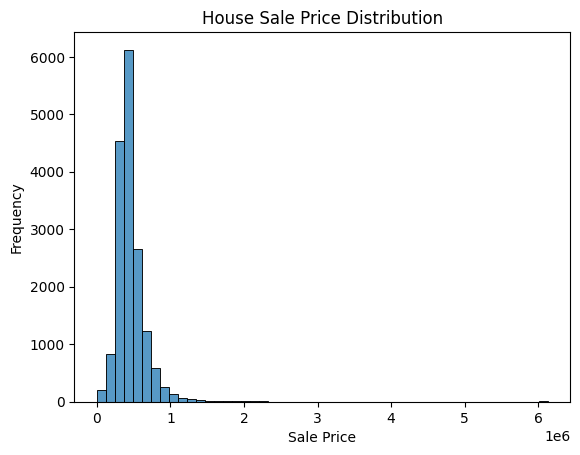

In [19]:
# look at sale price distribution
var = 'sale_price'
sns.histplot(df[var], bins=50)
plt.title('House Sale Price Distribution')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

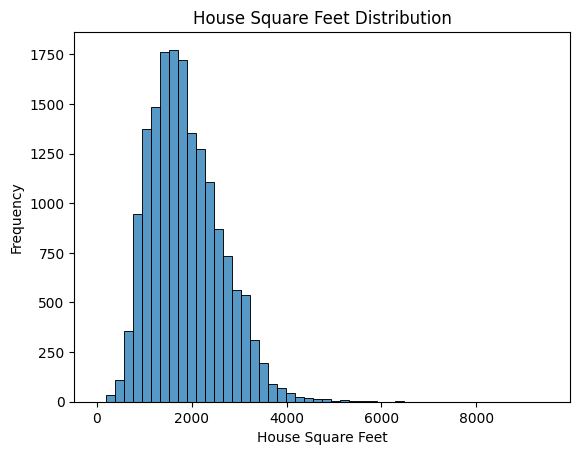

In [20]:
# look at house square feet
var = 'house_square_feet'
sns.histplot(df[var], bins=50)
plt.title('House Square Feet Distribution')
plt.xlabel('House Square Feet')
plt.ylabel('Frequency')
plt.show()

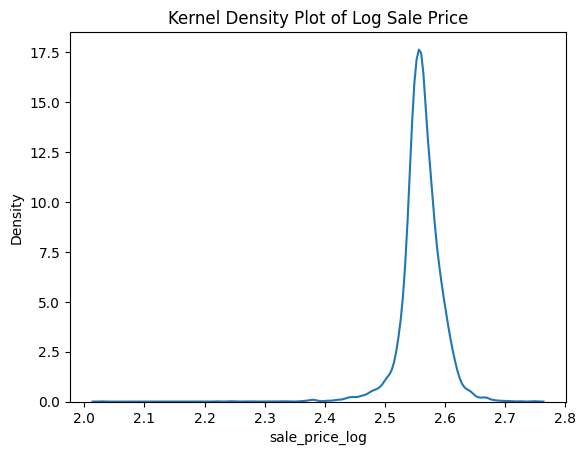

In [23]:
# kernel density plot of the log of sale price
df['sale_price_log'] = np.log(df['sale_price'])

var = 'sale_price_log'
sns.kdeplot(df[var])
plt.title('Kernel Density Plot of Log Sale Price')
plt.show()

[Text(0.5, 1.0, 'Log Sale Price Conditional on Garage Type')]

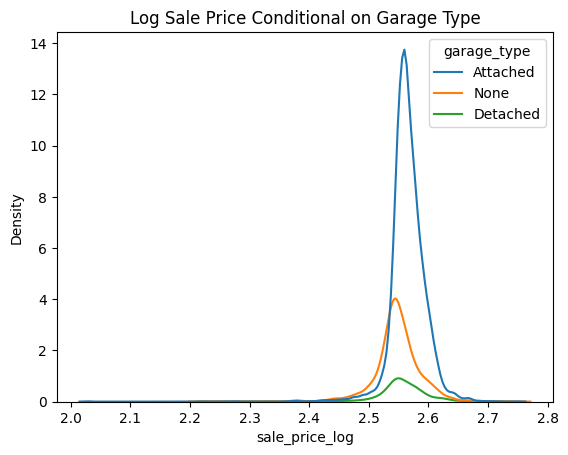

In [26]:
# kernel density plot of the log of price conditional on garage type
conditioning = 'garage_type'
var = 'sale_price_log'
fig = sns.kdeplot( data=df, x=var, hue=conditioning)
fig.set(title='Log Sale Price Conditional on Garage Type')

In [ ]:
# Q2 transform any categorical variables for use in regression analysis
# garage_type
